Silent substitution example
===========================

In [1]:
import sys
sys.path.insert(0, '../')
import random

from colour.plotting import plot_chromaticity_diagram_CIE1931
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from silentsub.silentsub import SilentSubstitution
from silentsub.colorfunc import LMS_to_xyY, xyY_to_LMS
from silentsub.plotting import stim_plot

sns.set_context('notebook')
sns.set_style('whitegrid')

In [2]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))
spds.columns.name = 'Wavelength'
spds

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        195      0.000026  0.000017  0.000041  0.000015  0.000036  0.000039   
        260      0.000141  0.000147  0.000168  0.000170  0.000155  0.000144   
...                   ...       ...       ...       ...       ...       ...   
9       3835     0.003609  0.004056  0.003476  0.003724  0.002943  0.003147   
        3900     0.003415  0.003666  0.003451  0.003724  0.002873  0.003021   
        3965     0.003560  0.003867  0.003539  0.003874  0.003191  0.003165   
        4030     0.003738  0.003652  0.003557  0.003737  0.002973  0.003205   
        4095     0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        195      0.000022  0.000032  0.000026  0.000021  ...  0.000022   
        260      0.000154  0.000121  0.000167  0.000169  ...  0.000088   
...                   ...       ...       ...       ...  ...       ...   
9       3835     0.003482  0.002543  0.003630  0.004153  ...  0.002318   
        3900     0.003112  0.002289  0.003514  0.004000  ...  0.002279   
        3965     0.003544  0.002428  0.003695  0.004005  ...  0.002134   
        4030     0.003420  0.002227  0.003520  0.003932  ...  0.002444   
        4095     0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength                772       773       774       775       776  \
Primary Setting                                                         
0       0        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        65       0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        130      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        195      5.119073e-07  0.000008  0.000009  0.000000  0.000015   
        260      7.298278e-05  0.000088  0.000081  0.000071  0.000086   
...                       ...       ...       ...       ...       ...   
9       3835     2.590713e-03  0.002629  0.002536  0.002962  0.002583   
        3900     2.669694e-03  0.002370  0.002300  0.002815  0.002574   
        3965     2.682856e-03  0.002604  0.002552  0.002775  0.002638   
        4030     2.647269e-03  0.002541  0.002408  0.002702  0.002547   
        4095     2.544598e-03  0.002587  0.002493  0.002923  0.002699   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000011  0.000000  0.000000  
        65       0.000000  0.000000  0.000000  0.000000  
        130      0.000000  0.000000  0.000000  0.000000  
        195      0.000012  0.000000  0.000018  0.000000  
        260      0.000086  0.000010  0.000100  0.000078  
...                   ...       ...       ...       ...  
9       3835     0.002606  0.002213  0.002467  0.002924  
        3900     0.002412  0.002107  0.002590  0.002938  
        3965     0.002748  0.002137  0.002676  0.002664  
        4030     0.002385  0.002038  0.002477  0.002837  
        4095     0.002592  0.002177  0.002471  0.002698  

[640 rows x 401 columns]

Instantiate `SilentSubstitution` class, which inherits from `silentsub.device.StimulationDevice`
------------------------------------------------------------------------------------------------

In [3]:
# list of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']

ss = SilentSubstitution(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1)

Plot the gamut
--------------

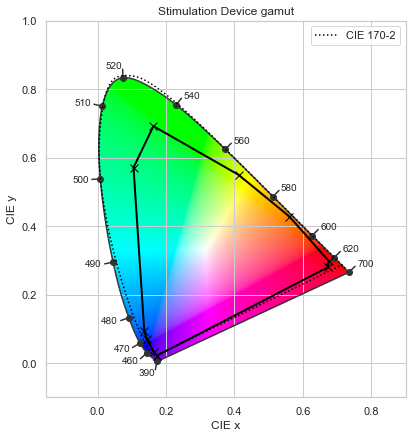

In [4]:
_ = ss.plot_gamut()

If you want to choose a background spectrum
-------------------------------------------

Requested LMS: [ 0.90570028  0.71772948  0.204594  ]
Solution LMS: [ 0.90570033  0.71772939  0.20459409]


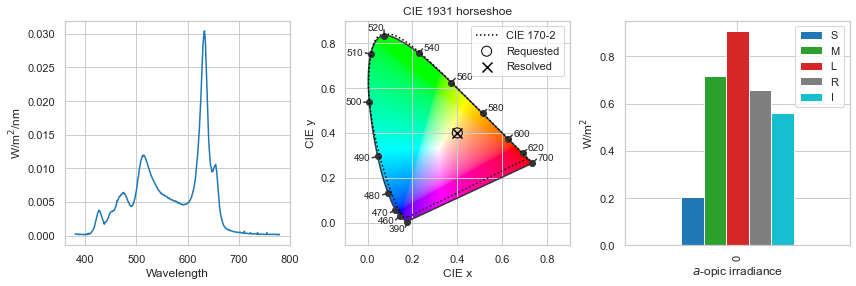

In [9]:
# orange background of 600 lx
requested_xyY = [.4, .4, 600.]

# find the spectrum
result = ss.find_background_spectrum(requested_xyY)  

# Get the LMS of solution and print
requested_lms = xyY_to_LMS(requested_xyY)
solution_lms = ss.predict_multiprimary_aopic(result.x)[['L','M','S']].values[0]
print(f'Requested LMS: {requested_lms}')
print(f'Solution LMS: {solution_lms}')

# Plot
f, axs = stim_plot()

# Plot the spectrum
ss.predict_multiprimary_spd(result.x).T.plot(ax=axs[0], legend=False)

# Plot solution on horseshoe
solution_xyY = LMS_to_xyY(solution_lms)
axs[1].scatter(x=requested_xyY[0], 
               y=requested_xyY[1],
               s=100, marker='o', 
               facecolors='none', 
               edgecolors='k', 
               label='Requested')
axs[1].scatter(x=solution_xyY[0], 
               y=solution_xyY[1],
               s=100, c='k',
               marker='x', 
               label='Resolved')
axs[1].legend()

# Plot aopic irradiances
device_ao = ss.predict_multiprimary_aopic(result.x)
device_ao.plot(kind='bar', color=ss.aopic_colors, ax=axs[2]);


Now we need to do the proper optimsation
----------------------------------------

In [8]:
ss.background = result.x
res = ss.find_modulation_spectra(target_contrast=.1)


Melanopsin contrast at minimum: -0.6832059378905057, accepted True
Melanopsin contrast at minimum: -0.6829743544723615, accepted True


TypeError: object of type 'NoneType' has no len()

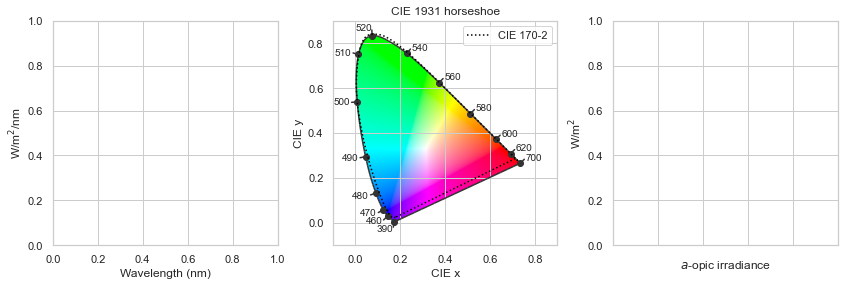

In [7]:
# Plot
f, axs = stim_plot()

# Plot the spectrum
axs[0].plot(ss.predict_multiprimary_spd(ss.background).T, label='Backgroud')
axs[0].plot(ss.predict_multiprimary_spd(res.x).T, label='Modulation')
axs[0].legend()

# Plot solution on horseshoe
solution_xyY = LMS_to_xyY(solution_lms)
axs[1].scatter(x=requested_xyY[0], 
               y=requested_xyY[1],
               s=100, marker='o', 
               facecolors='none', 
               edgecolors='k', 
               label='Background')
axs[1].scatter(x=solution_xyY[0], 
               y=solution_xyY[1],
               s=100, c='k',
               marker='x', 
               label='Modulation')

# Plot aopic irradiances
device_ao = ss.predict_multiprimary_aopic(result.x)
device_ao.plot(kind='bar', color=ss.aopic_colors, ax=axs[2]);
axs[2].set(
    xticklabels='',
    ylabel='W/m$^2$',
    xlabel='$a$-opic irradiance'
);